## Project: Identify common English words in the human proteome
#### Violette SILVE - M2 MODE - ICE 2019

In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np

# Set working directory (needed in order to import datasets later)
import os
os.chdir("/Users/Violettesilve/Desktop/M2/ICE/ICE_genome")

In [2]:
# Function readFastaFile1 provided by Emmanuelle Becker
# PARAMETERS : the filename (the file is in fasta format)
# RETURNS : a unique string with all the protein sequences concatenated

def readFastaFile1(filename) :
    
    # opening the file whose name is filename
    fd = open(filename,'r')
    txt = fd.read()
    fd.close()
    
    # txt contains all the text of the file. 
    # fisrt, I want to seperate the proteins, the symbol that starts a new protein is '>'
    seqs = txt.split('>')[1:]
    s = ""
    
    for seq in seqs :
        lines = seq.split('\n')[1:]     
        for line in lines :
            s = s + line
    return(s)

In [3]:
# Import dataset

# Proteome
proteome = readFastaFile1("human-proteome.fasta")

# English words
words=open("english-words.txt","r")
words=words.read()
words = words.split('\n')[0:]

In [4]:
# Loop calculating how many times each word appears in the proteome.
# It creates an array containing the number of apparitions for each word.

nb_apparitions=[]
for word in words :
    nb_apparitions.append(proteome.count(word.upper()))

In [5]:
# Create a table containing the words, facing their number of apparitions in the proteome
apparitions = np.column_stack((words, nb_apparitions))

# Checking if the loop went correctly by printing the words
# which appeared in the proteome and how many time they appeared.
for i in range (0,len(apparitions)):
    if int(apparitions[i,1])>0:
        print(apparitions[i,])

['a' '798126']
['access' '1']
['acid' '39']
['act' '849']
['active' '1']
['ad' '32408']
['adapt' '5']
['add' '1609']
['admire' '1']
['admit' '2']
['afraid' '2']
['after' '8']
['again' '5']
['age' '3335']
['agent' '8']
['agree' '17']
['ah' '17970']
['ahead' '1']
['aid' '1298']
['aide' '77']
['AIDS' '104']
['aim' '727']
['air' '1673']
['alive' '5']
['all' '9527']
['ally' '205']
['alter' '11']
['AM' '16737']
['and' '911']
['anger' '5']
['angle' '4']
['angry' '2']
['any' '660']
['apart' '12']
['appeal' '3']
['apple' '21']
['apply' '6']
['area' '301']
['arise' '10']
['arm' '856']
['armed' '5']
['army' '18']
['arrive' '1']
['art' '1860']
['as' '65685']
['Asian' '9']
['aside' '6']
['ask' '2833']
['asleep' '2']
['assess' '9']
['asset' '25']
['assist' '2']
['at' '41518']
['award' '1']
['aware' '4']
['away' '9']
['cake' '47']
['call' '196']
['camera' '1']
['camp' '12']
['can' '513']
['cap' '903']
['car' '832']
['card' '35']
['care' '34']
['carry' '1']
['case' '49']
['cash' '113']
['cast' '47']
[

['wash' '19']
['waste' '2']
['watch' '1']
['water' '1']
['wave' '42']
['way' '179']
['we' '9493']
['weak' '33']
['wear' '43']
['week' '77']
['weekly' '1']
['well' '125']
['west' '17']
['wet' '427']
['what' '8']
['when' '5']
['while' '3']
['why' '95']
['wide' '13']
['wife' '12']
['wild' '28']
['will' '47']
['win' '300']
['wind' '14']
['wine' '23']
['wing' '17']
['wipe' '36']
['wire' '34']
['wise' '31']
['wish' '13']
['with' '10']
['wrap' '23']
['write' '1']
['yard' '41']
['yeah' '27']
['year' '69']
['yell' '178']
['yes' '1043']
['yet' '880']
['yield' '4']


In [6]:
# How many letters does the longest word have?

max=0
for i in range (0,len(words)):
    if (len(words[i])>max) :
        max=len(words[i])
print(max)

16


Text(0, 0.5, 'Number of words')

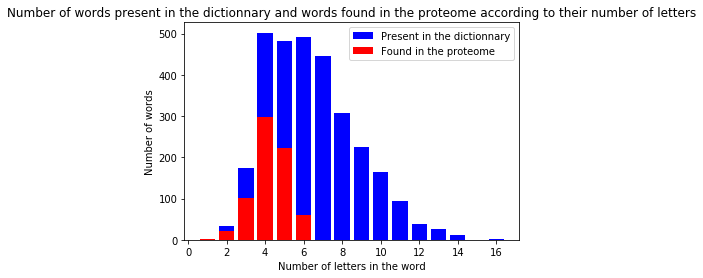

In [7]:
# The goal here is to count how many words were present according to their number of letters (array "present")
# And how many of these words were found in the proteome ("found")

present = np.repeat(0,max+1) # Contains max+1 rows, going from 0 to max
found = np.repeat(0,max+1)
for i in range (0,len(words)):
    # Add +1 to the cell corresponding to the number of letters of the i word
    present[len(words[i])]=present[len(words[i])]+1
    if nb_apparitions[i]>0:
        # Add +1 to the cell corresponding to the number of letters of the i word if the word was found in the proteome
        found[len(words[i])]=found[len(words[i])]+1


# Graphical representation
p1=plt.bar(range(1,17),found[1:len(found)],color="red")
p2=plt.bar(range(1,17),present[1:len(present)]-found[1:len(found)],bottom=found[1:len(found)],color="blue")
plt.legend((p2[0], p1[0]), ('Present in the dictionnary','Found in the proteome'))
plt.title("Number of words present in the dictionnary and words found in the proteome according to their number of letters")
plt.xlabel("Number of letters in the word")
plt.ylabel("Number of words")

We can see that most of the words found in the proteome were small words. 
But maybe we can represent this in a different way...

[0, 1.0, 0.6470588235294118, 0.5804597701149425, 0.5916334661354582, 0.45962732919254656, 0.12016293279022404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0]


Text(0, 0.5, 'Percentage of presence in the proteome')

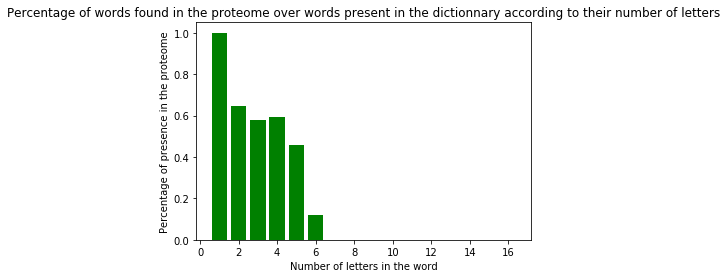

In [8]:
# Percentage contains the percentage of words found according to their number of letters
# A loop is needed in order to avoid dividing by 0.
percentage = []
for i in range (0,len(found)):
    if present[i]>0 :
        percentage.append(found[i]/present[i])
    else :
        percentage.append(0)
print(percentage)

plt.bar(range(1,17),percentage[1:len(percentage)],color="green")
plt.title("Percentage of words found in the proteome over words present in the dictionnary according to their number of letters")
plt.xlabel("Number of letters in the word")
plt.ylabel("Percentage of presence in the proteome")

All the words containing 1 letter were found. Up to 4 letters in the word, around 60% of them were found in the proteome. 
On this graph it appears more clearly that the longer the word is, the harder it is to find it by chance in the proteome, which is logical.